# Mushroom Cultivation Analysis
Alessio Carnevale, Manuel Cattoni

In [10]:
import numpy as np

In [11]:
def likelihood(theta, x, n, y):
    """
    Compute the likelihood L(θ) for the binomial logistic regression model.

    Parameters
    ----------
    theta : array-like of shape (2,)
        Parameters [alpha, beta].
    x : array-like
        Temperature values x_i.
    n : array-like
        Number of mushrooms n_i.
    y : array-like
        Number of spoiled mushrooms y_i.

    Returns
    -------
    float
        Likelihood value L(θ).
    """
    alpha, beta = theta

    # logistic function
    p = 1 / (1 + np.exp(-(alpha + beta * x)))

    # likelihood product (no binomial coefficient)
    L = np.prod(p**y * (1 - p)**(n - y))
    
    return L


def log_likelihood(theta, x, n, y):
    """
    Compute the log-likelihood ℓ(θ) for the binomial logistic regression model.

    Parameters
    ----------
    theta : array-like of shape (2,)
        Parameters [alpha, beta].
    x : array-like
        Temperature values x_i.
    n : array-like
        Number of mushrooms n_i.
    y : array-like
        Number of spoiled mushrooms y_i.

    Returns
    -------
    float
        Log-likelihood value ℓ(θ) (up to an additive constant).
    """
    alpha, beta = theta

    # logistic function
    p = 1 / (1 + np.exp(-(alpha + beta * x)))

    # log-likelihood (dropping constant binomial coefficient term)
    ll = np.sum(y * np.log(p) + (n - y) * np.log(1 - p))
    
    return ll


In [12]:
x = np.array([2, 8, 15, 25])
n = np.array([30, 25, 20, 30])
y = np.array([2, 4, 5, 20])

theta = np.array([0.1, 0.05])

print(likelihood(theta, x, n, y))
print(log_likelihood(theta, x, n, y))


3.741865702820402e-38
-86.1786491957106


/var/folders/0l/91zty_zs7bj5b_1bwsr3q2y40000gn/T/ipykernel_30797/3537681985.py:58: RuntimeWarning: divide by zero encountered in log
  ll = np.sum(y * np.log(p) + (n - y) * np.log(1 - p))


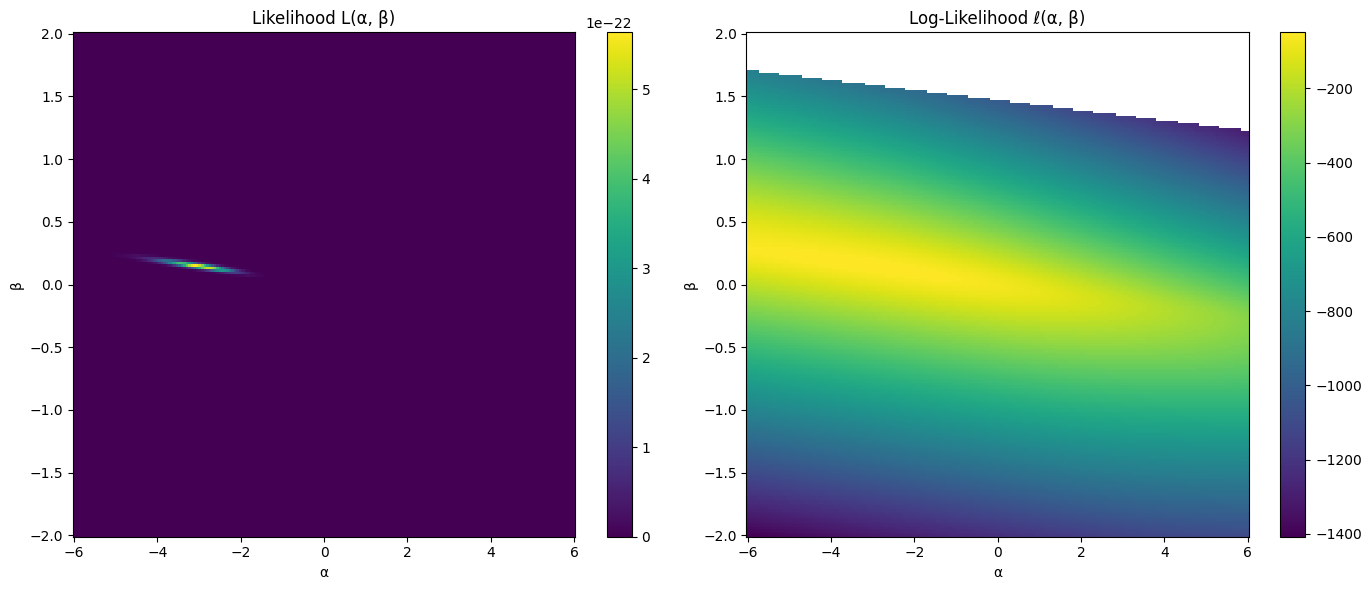

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Grid ranges
alpha_vals = np.linspace(-6, 6, 200)
beta_vals = np.linspace(-2, 2, 200)

A, B = np.meshgrid(alpha_vals, beta_vals)

L = np.zeros_like(A)
LL = np.zeros_like(A)

# Compute likelihoods
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        theta = (A[i, j], B[i, j])
        L[i, j] = likelihood(theta, x, n, y)
        LL[i, j] = log_likelihood(theta, x, n, y)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

pc1 = axes[0].pcolormesh(A, B, L, shading='auto')
axes[0].set_title("Likelihood L(α, β)")
axes[0].set_xlabel("α")
axes[0].set_ylabel("β")
fig.colorbar(pc1, ax=axes[0])

pc2 = axes[1].pcolormesh(A, B, LL, shading='auto')
axes[1].set_title("Log-Likelihood ℓ(α, β)")
axes[1].set_xlabel("α")
axes[1].set_ylabel("β")
fig.colorbar(pc2, ax=axes[1])

plt.tight_layout()
plt.show()
